# Privatization of Space 

Exploration of the data available to see if we can answer questions of the overall trends. 

1. Are rockets launches increasing both quantity and success rate?
2. Has the private sector become more dominant now?
3. Are public or private space launches more successful?

To take a closer look at these questions the first thing is look at first few rows at how the data looks and to see if any cleaning is required from data acquired in https://www.kaggle.com/datasets/davidroberts13/one-small-step-for-data

In [1]:
# Load libraries and check if any cleaning is required?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


space_df = pd.read_csv('Global Space Launches.csv')
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


The first thing to clear up is any null values and see if we need to drop anything. Per the output below we find that only the rocket column has any null values as this is not used by me. I choose to ignore it for now.

In [2]:
# Check if any null values
space_df.isnull().sum()

Company Name                     0
Location                         0
Detail                           0
Status Rocket                    0
 Rocket                       3360
Status Mission                   0
Country of Launch                0
Companys Country of Origin       0
Private or State Run             0
DateTime                         0
Year                             0
Month                            0
Day                              0
Date                             0
Time                             0
dtype: int64

As I want to look at figures over the decades instead of years I will add a new decade column to group these by decade using the year column to create said records.

In [3]:
# First add decades to divide analysis by those
space_df['decade'] = space_df['Year'].apply(lambda row : str(row)[:-1] + '0\'s')
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,decade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12,2020's
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01,2020's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57,2020's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25,2020's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50,2020's


As the 2020's decade has not been completed, and really is just getting started, I will remove the 2020's from the dataset.

In [4]:
# Also dropping data from 2020 since decade isn't complete and barely starting.
space_df = space_df[space_df.decade != '2020\'s']
space_df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,decade
63,CASIC,"LC-101, Wenchang Satellite Launch Center, China",Long March 5 | Shijian-20,StatusActive,NaN,Success,China,China,S,2019-12-27 12:45:00+00:00,2019,12,27,27/12/2019,12:45,2010's
64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.8,Success,Russia,Russia,S,2019-12-26 23:11:00+00:00,2019,12,26,26/12/2019,23:11,2010's
65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.0,Success,Kazakhstan,Russia,S,2019-12-24 12:03:00+00:00,2019,12,24,24/12/2019,12:03,2010's
66,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V N22 | Starliner OFT,StatusActive,NaN,Success,USA,USA,P,2019-12-20 11:36:00+00:00,2019,12,20,20/12/2019,11:36,2010's
67,CASIC,"LC-9, Taiyuan Satellite Launch Center, China","Long March 4B | CBERS-4A, ETRSS-1 & Others",StatusActive,64.68,Success,China,China,S,2019-12-20 03:22:00+00:00,2019,12,20,20/12/2019,03:22,2010's


With this now I am confident I can begin plotting any observations and possibly comment on them.

## Are space launches increasing both quantity and success rate?

Perhaps the most crucial question for space exploration is how successful we are. After all, this can be both a challenging and costly expense. To answer this question, let's look at space exploration volume and success rates by decade.

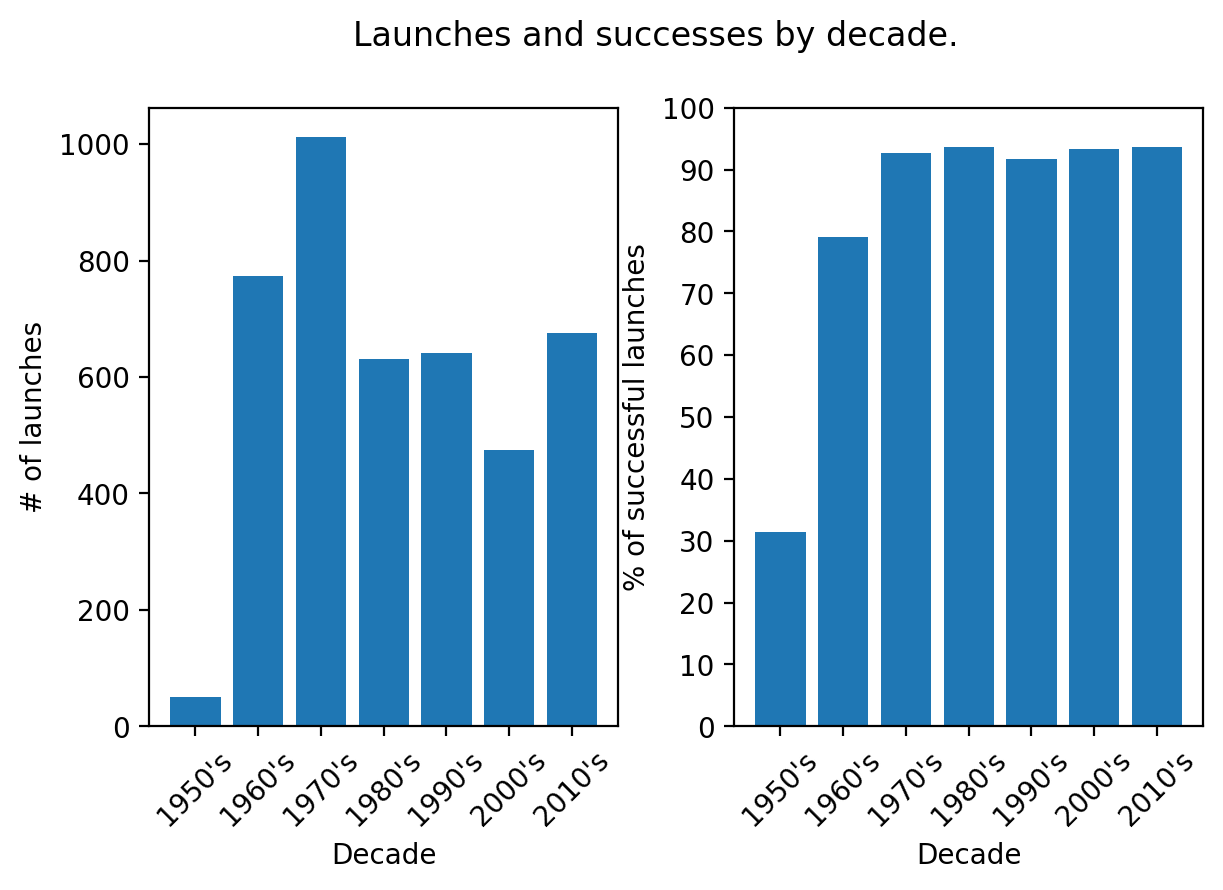

In [5]:
# space launches
space_launches = space_df.groupby('decade')['decade'].count()
fig, ax = plt.subplots(1,2)
fig.set_dpi(200)
fig.suptitle('Launches and successes by decade.')
fig.tight_layout()
ax[0].bar(space_launches.keys(), space_launches.values)
ax[0].set_ylabel('# of launches')
ax[0].set_xlabel('Decade')
ax[0].tick_params(axis='x', rotation=45)
# space successes percentages
space_df['success'] = (space_df['Status Mission'] == 'Success')
space_success = space_df.groupby('decade')['success'].mean() * 100
ax[1].bar(space_success.keys(), space_success.values)
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('% of successful launches')
ax[1].set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax[1].tick_params(axis='x', rotation=45);

For volume, we see the launches go from 51 in the 50s, possibly because launches started in 1957, to over 1012 in the 70s. Then launches suggested waning interest and funding with about a 40% drop, dropping to about 600 each decade in the 80s and 90s. The 2000s sees another drop to 475 before picking back up to 676 in the last decade of the 2010s. This rise suggests that we were very interested in space exploration until the 70s, then interest dropped until the 2000s, and then again picked back up in the 2010s. While the levels have not reached the 70s, it may be possible that interest will again get high in this decade.
Success rates range from 31.4% in the 50s, most likely because it was in its infancy, to 93.68% in the 80s. We see the most significant increases in the 60s and 70s. After that, the success rate seems to level off with percentages in the low 90 range.

## Has the private sector become more dominant now?

We have seen that interest seems to have picked up again with space exploration. The question is what role the private sector has to play in this. After all, with the cost and difficulty, the question is how much of a role the private sector plays.

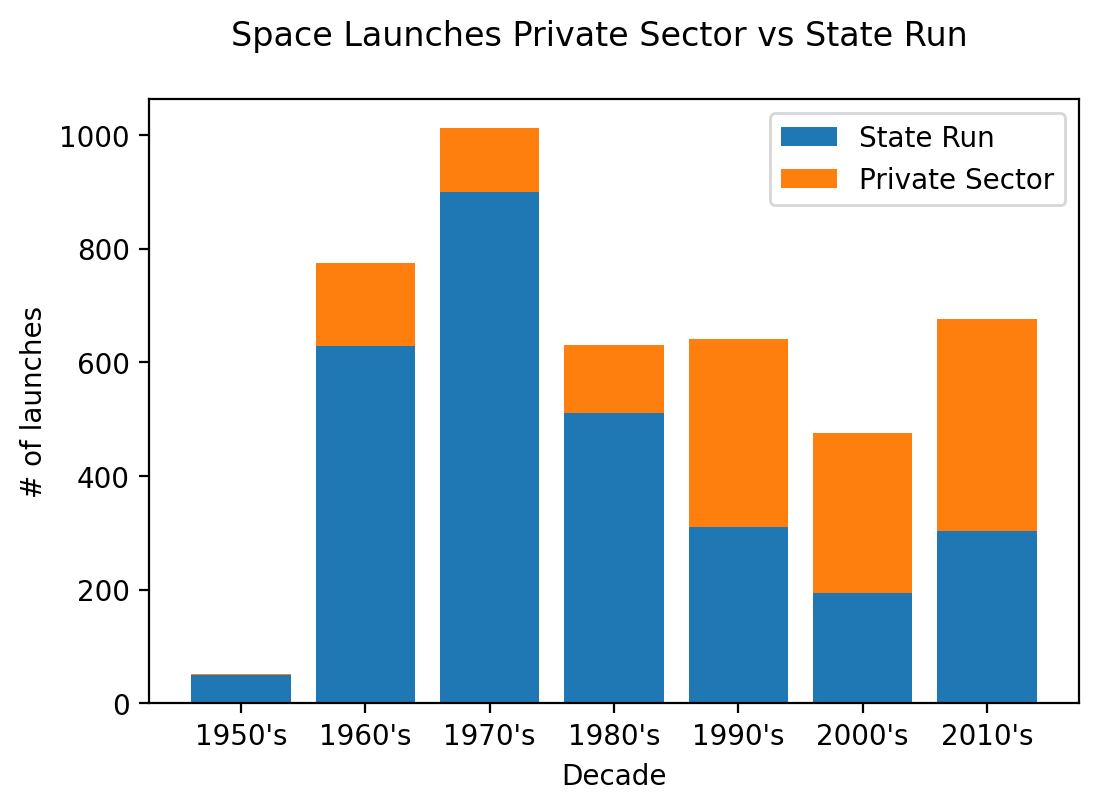

In [6]:
# Is private sector more dominant now?
space_private = space_df.groupby(['decade', 'Private or State Run'])['Company Name'].count()
decades = space_private.index.unique(0)
private = [space_private[x]['P'] for x in decades]
public = [space_private[x]['S'] for x in decades]
fig, ax = plt.subplots()
fig.suptitle('Space Launches Private Sector vs State Run')
fig.set_dpi(200)
ax.bar([x for x in decades], public, label='State Run')
ax.bar([x for x in decades], private, bottom=public, label='Private Sector')
ax.set_ylabel('# of launches')
ax.set_xlabel('Decade')
ax.legend();

At first glance, it's evident that the number of launches was first dominated by state-run entities from the 50s to the 80s. Then starting from the 90s, the share of launches became more even, with the private sector running most of the launches from then onwards. 

From the graph, we can see that the negative trend in space did continue from the 70s to the 2000s in state-run space launches, at least from state-run launches. The private sector seems to have kept the launch numbers from completely dipping too far. As of now, space exploration has become more of a private-sector endeavor.

## Are state run or private sector space launches more successful?

There is a debate about whether or not the "market" does a better job than the government. Per the graph below, we can analyze this further.

[-32.0, -3.749672803420296, -3.8253968253968225, -3.49151989562948, 0.20302891947814317, 4.230769230769226, 4.621346853183965]


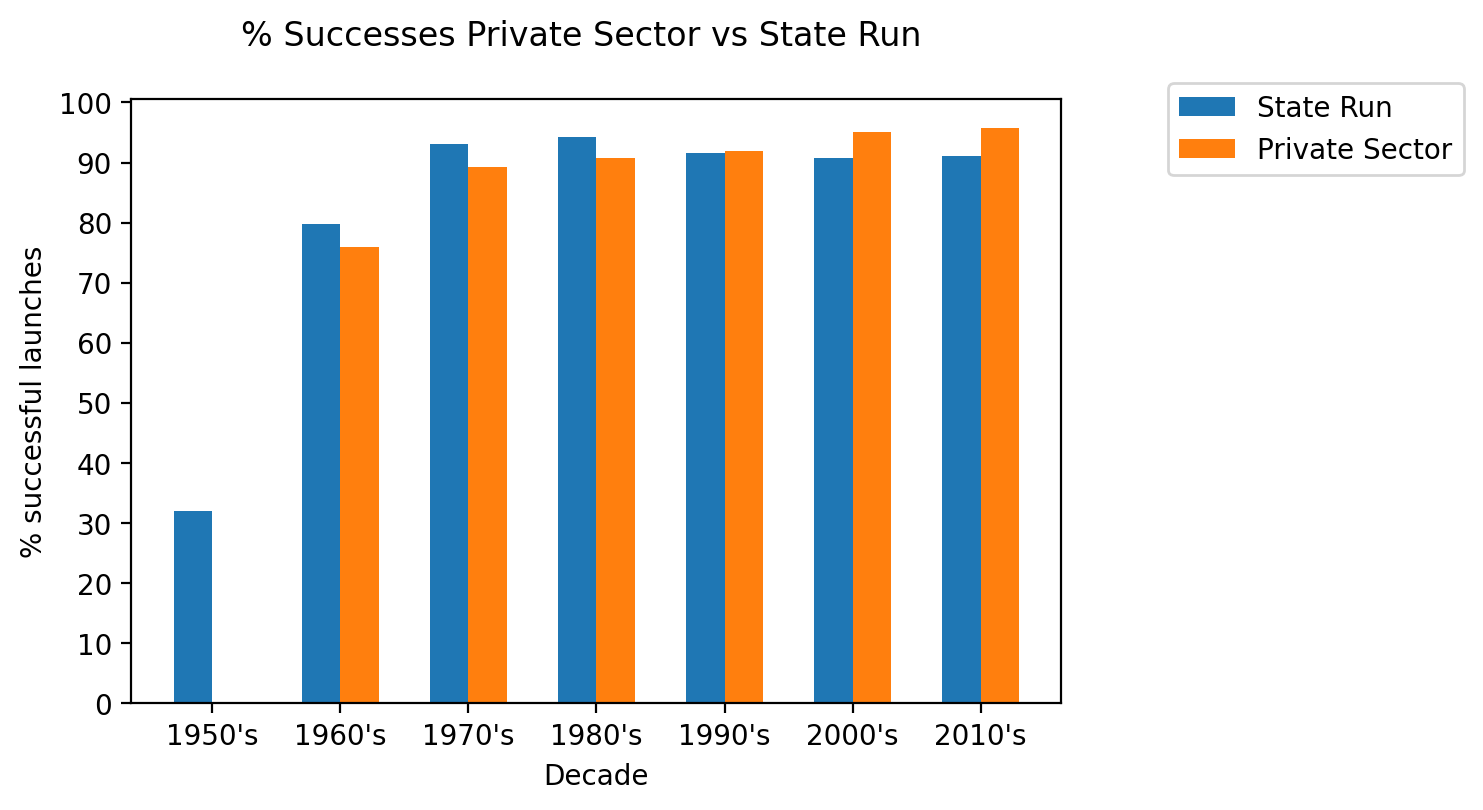

In [7]:
sector_success = space_df.groupby(['decade', 'Private or State Run'])['success'].mean() * 100
decades = sector_success.index.unique(0)
private = [sector_success[x]['P'] for x in decades]
public = [sector_success[x]['S'] for x in decades]
fig, ax = plt.subplots()
fig.set_dpi(200)
fig.suptitle('% Successes Private Sector vs State Run')
width = 0.3
indeces = np.arange(len(decades))
ax.bar(indeces, public, width, label='State Run')
ax.bar(indeces+width, private, width, label='Private Sector')
plt.xticks(indeces + width / 2, decades)
ax.set_ylabel('% successful launches')
ax.set_xlabel('Decade')
print([private[x]-public[x] for x in range(len(private))])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.legend(bbox_to_anchor=(1.1, 1.05));

During the 50s, neither the state-run nor private sector had great success. The lone private sector launch failed. For this reason, I will leave it our comparison.

For the launches, we see that from the 60s to the 80s, there is a slight edge for state-run launches. During this time, the max difference in percentages was about 3.83% in the '70s. 

After that, from the 90s onwards, it has gone to the private sector, having higher success rates. While the difference may seem low (0.2%), it was the first time the private sector could outperform state-run launches. Since then, the trend has seen more significant increases, with a 4.62% difference in the 2010s.